In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans, OPTICS
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import pdist, cosine
import matplotlib.pyplot as plt

from transformers import BertTokenizer, BertModel
import torch

C:\Users\Milosz\miniconda3\envs\kosciuszkon\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("../data/hobbies.csv", index_col=[0])

In [3]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
def embed(sentence):
    tokens = tokenizer.encode(sentence, add_special_tokens=True)
    input_ids = torch.tensor([tokens])
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs.last_hidden_state

    return embeddings[0].mean(axis=0).numpy()

In [5]:
s_bert = np.stack(df['HOBBIES'].apply(embed))

In [6]:
s_bert

array([[ 0.05780482,  0.2194282 , -0.4078196 , ..., -0.30458406,
        -0.24937482, -0.21889877],
       [-0.01994592, -0.15702362, -0.3982211 , ..., -0.03904746,
         0.04473481, -0.23146155],
       [ 0.01640029, -0.43739   , -0.03793653, ...,  0.28622743,
         0.08549547, -0.28128397],
       ...,
       [ 0.25306785,  0.4331704 , -0.4013434 , ..., -0.2658379 ,
        -0.17254364, -0.43554068],
       [ 0.31594637,  0.17608666, -0.39760748, ..., -0.05316748,
        -0.5511391 , -0.53004825],
       [ 0.2759493 , -0.37829688, -0.03586436, ...,  0.11101593,
        -0.33802032, -0.27320743]], dtype=float32)

In [7]:
s_bert.shape

(649, 768)

In [8]:
np.save("../data/embeds_bert_768.npy", s_bert) 

In [9]:
tsne = TSNE(n_components=2, random_state=42)
embedded_matrix = tsne.fit_transform(s_bert)

In [10]:
#dbscan = DBSCAN(eps=5.0, min_samples=3)
#labels = dbscan.fit_predict(s_bert)

kmeans = KMeans(n_clusters=50, random_state=0)
kmeans.fit(s_bert)
labels = kmeans.labels_

C:\Users\Milosz\miniconda3\envs\kosciuszkon\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


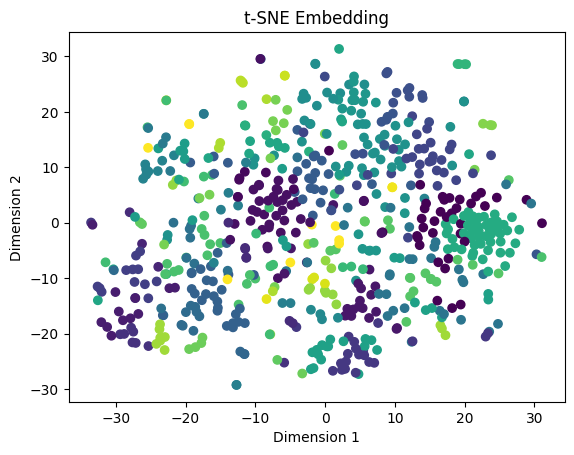

In [11]:
# Plot the embedded matrix
plt.scatter(embedded_matrix[:, 0], embedded_matrix[:, 1], c=labels)
plt.title("t-SNE Embedding")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [12]:
df['labels'] = labels
df_sorted = df.sort_values(by=['labels', 'HOBBIES'])

In [13]:
df.to_csv("../data/hobbies_clusters.csv")

In [14]:
df_sorted.groupby('labels').apply(display)

,HOBBIES,labels
49,Back packing,0
52,Badge Collecting,0
295,Boating,0
306,Brewing Beer,0
307,Bridge,0
328,Cigar Smoking,0
329,Climbing,0
330,Cloud Watching,0
347,Cooking,0
360,Cycling,0


,HOBBIES,labels
6,Airbrushing,1
300,Bookbinding,1
354,Crochet,1
355,Crocheting,1
356,Cross-Stitch,1
602,Sketching,1
275,Sun tanning,1


,HOBBIES,labels
20,Animal care,2
30,Aromatherapy,2
47,Automotive work/repair,2
280,Beekeeping,2
289,Blacksmithing,2
314,Cake Decorating,2
389,Falconry,2
397,Fishkeeping,2
401,Flower arranging,2
402,Flower collecting and pressing,2


,HOBBIES,labels
26,Archaeology,3
29,Architecture,3
34,Art collecting,3
268,Arts,3
41,Astronomy,3
308,Bridge Building,3
321,Cartooning,3
324,Ceramics,3
368,Digital Photography,3
382,Electronics,3


,HOBBIES,labels
3,Aerobics,4
291,BMX,4
283,Bicycle Polo,4
284,Bicycling,4
285,Billiards,4
304,Brazilian jiu-jitsu,4
466,Kabaddi,4
485,Lawn Darts,4
537,Parachuting,4
565,Racquetball,4


,HOBBIES,labels
465,Jump Roping,5
538,Paragliding or Power Paragliding,5


,HOBBIES,labels
10,All-Terrain vehicles,6
14,Amateur astronomy,6
15,Amateur geology,6
16,Amateur meteorology,6
509,Meteorology,6
613,Stand-up comedy,6
215,Weather Forecasting,6
641,Weather Watcher,6


,HOBBIES,labels
4,Air hockey,7
5,Air sports,7
393,Field hockey,7
398,Flag Football,7
449,Ice hockey,7
143,Table Tennis,7
144,Table football,7
165,Touch football,7


,HOBBIES,labels
169,Field,8
13,Amateur Radio,8
17,American football,8
39,Association football,8
43,Australian Football League,8
271,Baseball,8
272,Basketball,8
325,Cheerleading,8
353,Cricket,8
376,Drama,8


,HOBBIES,labels
48,BMX tricks,9
293,Board sports,9
296,Body Building,9
297,Bodybuilding,9
372,Dog sport,9
386,Equestrianism,9
445,Horse riding,9
543,Pigeon racing,9
60,Sculling or Rowing,9
72,Shooting sport,9


,HOBBIES,labels
262,Animal fancy,10
266,Aqua-lung,10
312,Butterfly Watching,10
350,Couponing,10
370,Do it yourself,10
371,Dodgeball,10
391,Felting,10
395,Fire Poi,10
403,Fly Tying,10
410,Four Wheeling,10


,HOBBIES,labels
434,Gyotaku,11
531,Origami,11


,HOBBIES,labels
32,Art Collecting / Collectibles,12
299,Book collecting,12
331,Coin Collecting,12
336,Collecting Music Albums,12
337,Collecting RPM Records,12
342,Comic book collecting,12
366,Diecast Collectibles,12
523,Movie and movie memorabilia collecting,12
573,Record collecting,12
64,Seashell collecting,12


,HOBBIES,labels
313,Button Collecting,13
383,Element collecting,13
431,Gun Collecting,13
582,Rock Collecting,13
630,Train Collecting,13
179,Trekkie,13


,HOBBIES,labels
578,Abandoned Animals,14
57,Ballooning,14
270,Base Jumping,14
290,Blogging,14
298,Bonsai Tree,14
311,Bus spotting,14
333,Collecting Antiques,14
365,Deltiology,14
409,Fossil hunting,14
420,Ghost hunting,14


,HOBBIES,labels
51,Backpacking,15
277,Beachcombing,15
287,Birding,15
288,Birdwatching,15
318,Canoeing,15
323,Cave Diving,15
369,Disc golf,15
396,Fishing,15
426,Golfing,15
437,Hang gliding,15


,HOBBIES,labels
24,Aquariums,16
411,Freshwater Aquariums,16
592,Saltwater Aquariums,16


,HOBBIES,labels
520,Mountain Biking,17
521,Mountain Climbing,17
522,Mountaineering,17
530,Orienteering,17
581,Rock climbing,17
601,Skeet Shooting,17
102,Snow Skiing,17
103,Snowboarding,17
212,Water Skiing,17


,HOBBIES,labels
379,Dumpster Diving,18
446,Hot air ballooning,18
451,Iceskating,18
82,Skate Boarding,18
84,Skateboarding/rollerblading,18
96,Sledding,18
104,Snowmobile Riding,18
106,Snowmobiling,18
107,Snowshoeing,18
220,White Water Rafting,18


,HOBBIES,labels
0,Acting,19
12,Alternative,19
267,Aquarium,19
38,Artwork,19
50,Backgamon,19
55,Ballet,19
276,Beach,19
334,Collecting Artwork,19
340,Color guard,19
192,DVD,19


,HOBBIES,labels
487,Learning A Foreign Language,20
488,Learning An Instrument,20
489,Learning To Pilot A Plane,20
547,Playing music,20
572,Reading To The Elderly,20


,HOBBIES,labels
33,Art and Crafts,21
36,Arts and Crafts,21
315,Calligraphy,21
348,Cosplay,21
352,Creative writing,21
544,Pinochle,21
61,Sculpting,21
126,Stained Glass,21
214,Watercolor Paintings,21


,HOBBIES,labels
424,Going to movies,22
495,Listening to music,22
540,People Watching,22
576,Renting movies,22
202,Walking and Hiking,22
208,Watching Movies,22
209,Watching Sports,22
210,Watching TV,22
640,Watching sporting events,22
88,playing soccer,22


,HOBBIES,labels
40,Astrology,23
358,Cryptography,23
114,Space Exploration,23
624,Tesla Coils,23


,HOBBIES,labels
269,Backgammon,24
294,BoardGames,24
357,Crossword Puzzles,24
374,Dominoes,24
399,Floorball,24
412,Frisbee Golf,24
460,Jigsaw Puzzles,24
135,Sudoku Puzzles,24
145,Tabletop games,24
160,Third person shooter games,24


,HOBBIES,labels
22,Antiquing,25
278,Beadwork,25
305,Breakdancing,25
317,Candle making,25
335,Collecting Hats,25
346,Conworlding,25
390,Fast cars,25
405,Footbag,25
421,Glassblowing,25
423,Gnoming,25


,HOBBIES,labels
1,Action Figures,26
11,Alternate reality games,26
25,Arcade Games,26
292,Board games,26
320,Card collecting,26
586,Roller derby,26
87,Skill games,26
134,Street games,26
618,Sudoku,26
190,Video Games,26


,HOBBIES,labels
260,Aeromodeling,27
309,Bringing Food To The Disabled,27
310,Building Dollhouses,27
338,Collecting Sports Cards,27
486,Learn to Play Poker,27
502,Making Model Cars,27
514,Model Railroading,27
515,Model Rockets,27
512,Model aircraft,27
513,Model building,27


,HOBBIES,labels
27,Archery,28
53,Badminton,28
302,Bowling,28
303,Boxing,28
326,Chess,28
361,Dance,28
363,Darts,28
392,Fencing,28
425,Golf,28
433,Gymnastics,28


,HOBBIES,labels
28,Archery/Crossbow,29
281,Bell Ringing,29
339,Collecting Swords,29
429,Grip Strength,29
476,Knife making,29
477,Knife throwing,29
505,Martial arts,29
549,Playing team sports,29
597,Self Defense,29
71,Shooting guns,29


,HOBBIES,labels
23,Antiquities,30
54,Baking,30
316,Camping,30
332,Collecting,30
341,Coloring,30
351,Crafts,30
359,Curling,30
364,Debate,30
373,Dolls,30
377,Drawing,30


,HOBBIES,labels
8,Aircraft spotting,31
9,Airsoft,31
261,Airsofting,31
569,Rappelling,31
225,Windsurfing,31


,HOBBIES,labels
560,R/C Boats,32
561,R/C Cars,32
562,R/C Helicopters,32
563,R/C Planes,32


,HOBBIES,labels
35,Art/antique collecting,33
37,Arts/cultural,33
367,Digital arts,33
158,Theater/Performing Arts,33
203,Walking/health,33


,HOBBIES,labels
408,Foreign language learning,34
436,Handwriting Analysis,34
504,Marksmanship,34
548,Playing musical instruments,34
67,Self-Improvement Courses,34
600,Singing In Choir,34
79,Singing Lessons,34
81,Singing/composing music,34
182,Tutoring,34
632,Tutoring Children,34


,HOBBIES,labels
286,Bird watching,35
419,Geocaching,35
468,Kayaking,35
474,Kitesurfing,35
77,Sightseeing,35
92,Sky diving,35
93,Skydiving,35
94,Skype,35
100,Snorkeling,35
111,Social Networking,35


,HOBBIES,labels
7,Aircraft,36
19,Animal,36
265,Animals,36
21,Antiques,36
418,Genealogy,36
456,Internet,36
458,Jet Engines,36
519,Motorcycles,36
122,Sports Cards,36
123,Sports memorabilia,36


,HOBBIES,labels
45,Auto racing,37
319,Car Racing,37
467,Kart racing,37
518,Motor sports,37
97,Slot car racing,37
133,Street Racing,37


,HOBBIES,labels
274,Beach Volleyball,38
142,Swimming pool,38
211,Water Polo,38
213,Water sports,38
89,free diving,38


,HOBBIES,labels
273,Baton Twirling,39
279,Beatboxing,39
301,Boomerangs,39
349,Cosplaying,39
422,Glowsticking,39
447,Hula Hooping,39
463,Juggling,39
475,Knapping,39
554,Powerboking,39
558,Pyrotechnics,39


,HOBBIES,labels
2,Adventure park,40
18,Amusement Park,40
186,Vacation cruises,40


,HOBBIES,labels
31,Art Activities,41
322,Casino Gambling,41
343,Compose Music,41
344,Computer activities,41
345,Computer programming,41
381,Educational Courses,41
525,Musical Instruments,41
157,Theater Sports,41
183,Types of Recreation,41
646,Writing Music,41


,HOBBIES,labels
56,Ballet Dancing,42
282,Belly Dancing,42
394,Figure skating,42
450,Ice skating,42
454,Inline skating,42
529,Nordic skating,42
551,Pole Dancing,42
587,Roller skating,42
115,Speed Skating,42
147,Tango Dance,42


,HOBBIES,labels
46,Autographs,43
453,Impersonations,43
494,Letterboxing,43
171,Trainspotting,43


,HOBBIES,labels
42,Audiophilia,44
44,Auto audiophilia,44
194,Videophilia,44


,HOBBIES,labels
140,Sweepstake,45
139,Sweepstakes,45


,HOBBIES,labels
327,Church/church activities,46
76,Show Choir,46
238,Worship Team,46


,HOBBIES,labels
585,Roleplaying,47


,HOBBIES,labels
499,Macrame,48
498,Macramé,48


,HOBBIES,labels
400,Floral Arrangements,49
469,Keep A Journal,49
473,Kites,49
66,Self-Improvement,49
609,Socializing with friends/neighbors,49
612,Spending time with family/kids,49
124,Sports on TV,49
176,Traveling and exploration,49
187,Vacations,49
236,World news or politics,49


""


In [15]:
dists = pdist(s_bert, metric='cosine')

[  226  3162 19570 53808 73317 45311 12294  2241   298    49] [2.22044605e-16 8.87795632e-02 1.77559126e-01 2.66338690e-01
 3.55118253e-01 4.43897816e-01 5.32677379e-01 6.21456943e-01
 7.10236506e-01 7.99016069e-01 8.87795632e-01]


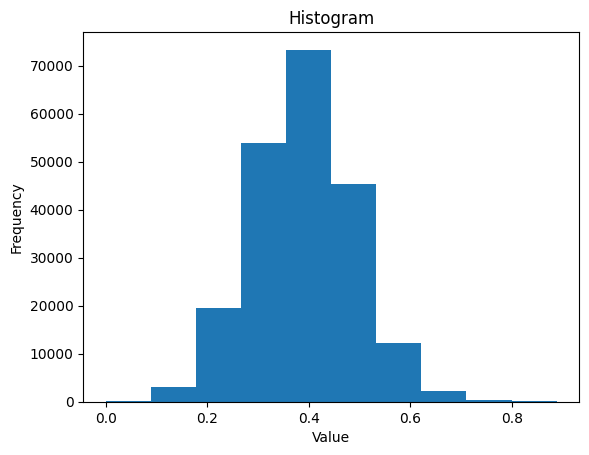

In [16]:
hist, bins = np.histogram(dists, bins=10)
print(hist, bins)
# Plot the histogram
plt.hist(dists, bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [17]:
paths = []

for idx_i, i in enumerate(s_bert):
    for idx_j, j in enumerate(s_bert):
        if cosine(i, j) < 0.15 and idx_i != idx_j:
            paths.append([idx_i, idx_j, 1-cosine(i, j)])

In [18]:
n_nodes = df.shape[0]
adj_matr = np.zeros((n_nodes, n_nodes))
weight_matr = np.zeros((n_nodes, n_nodes))

In [19]:
for x, y, w in paths:
    if x != y:
        adj_matr[y, x] = 1
        adj_matr[x, y] = 1
        weight_matr[x, y] = w

In [20]:
adj_matr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
import networkx as nx

In [22]:
G = nx.from_numpy_array(adj_matr)

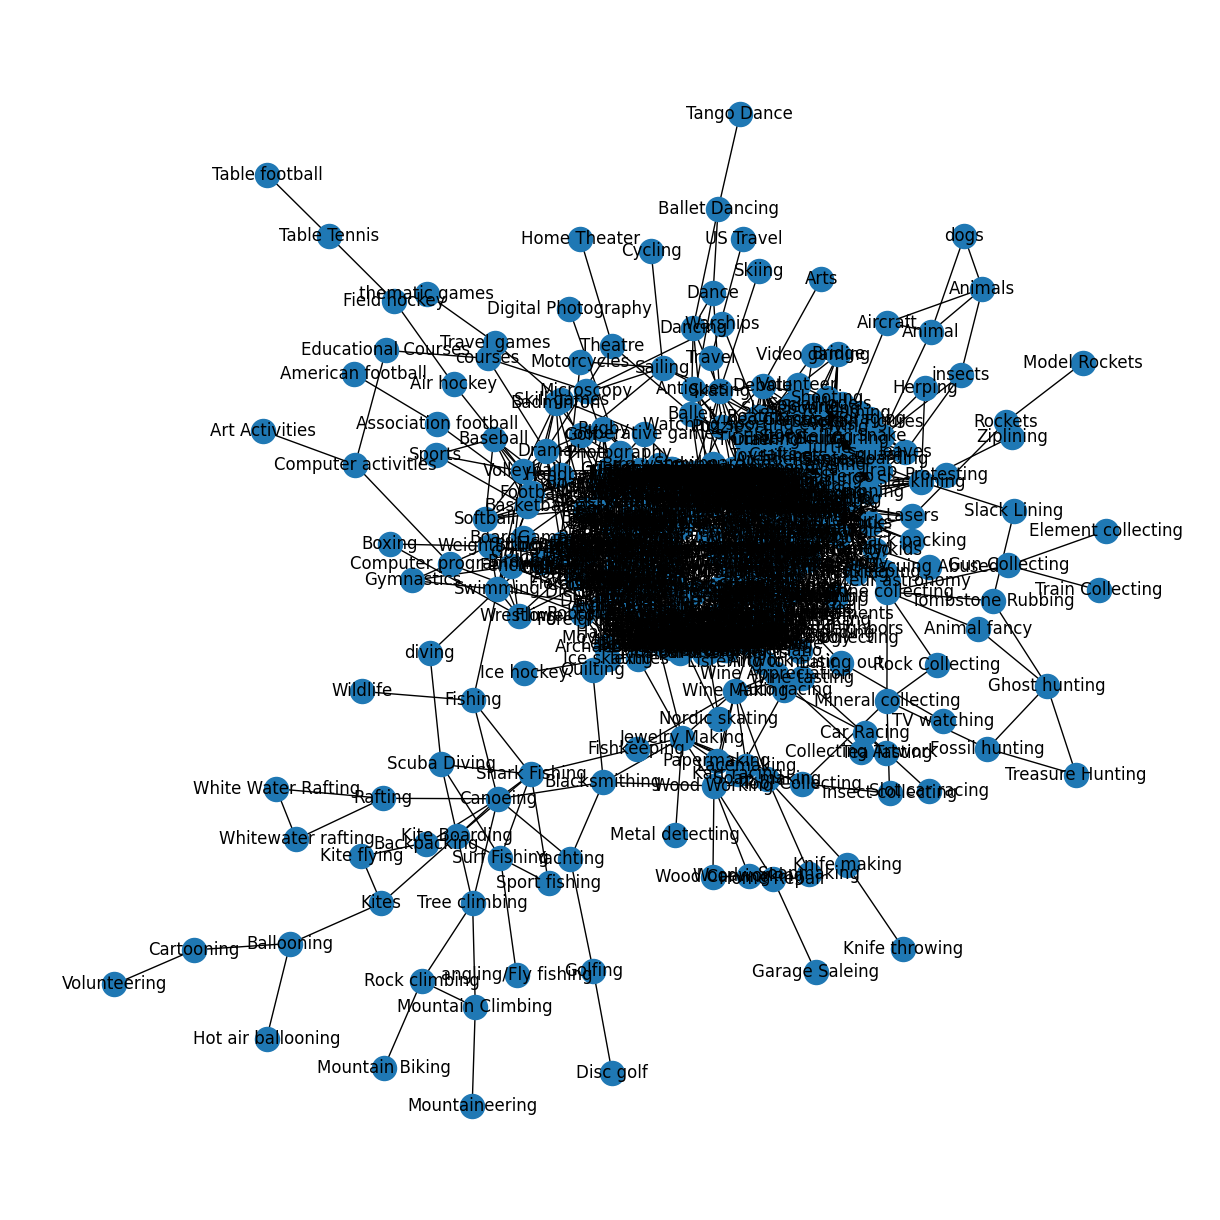

In [23]:
plt.figure(3,figsize=(12,12))
nx.draw_kamada_kawai(G, labels=df['HOBBIES'], with_labels=True)

In [24]:
np.save("../data/adj_hobbies.npy", adj_matr)
np.save("../data/weight_adj_hobbies.npy", weight_matr)